# More on numerical differentiation
## Beyond the Forward-Difference approximation

In this lecture we are going to continue to discuss numerical differentation by moving on from the Forward-Difference approximation. Recalling where we left off last lecture, we saw that we could not use the Forward-Difference approximation at all of our data points. In particular, we could not use it at the right endpoint because the approximation
$$f'(x) = \frac{f(x+h) - f(x)}{h} + \mathcal{O}(h)$$
relies on data points to the *right* (or forward) of the point of interest, $x$, and at the furthest-right point of our dataset there *are no points to the right of it.*

In the activity we saw a way to derive new derivative approximations. We finished the activity by deriving the Centered-Difference approximation, 
$$f'(x) = \frac{f(x+h) - f(x-h)}{2h} + \mathcal{O}(h^2).$$
This approximation is better because it is a *higher-order method.* Indeed, it is a *second-order method* because the error behaves like $h^2$ as $h\to 0$. Recall that since $h\ll1$, $h^2 \ll h$. Unfortunately, the Centered-Difference approximation suffers the same fate as Forward-Difference because it relies on points to the right of the current data point (due to the $f(x + h)$). 

So what do we do instead? Let's look back at the activity and look at using only the points $x$ and $x-h$. This is a good idea because it uses points at $x$ and to the left (or *backward*) of $x$. Consider the following 

$
\begin{align}
 f(x-h) &= f(x) -&& h f'(x) &&+ \frac12 h^2 f''(x) &+& \mathcal{O}(h^3)\\
 f(x) &= f(x) +&& 0f'(x) &&+ 0f''(x) &+& 0
\end{align}
$

If we take $-1 f(x-h) + 1 f(x)$ we arrive at
$$
f(x) - f(x-h) = hf'(x) - \frac12 h^2 f''(x) + \mathcal{O}(h^3)
$$
yielding (upon dividing by $h$):
$$
\frac{f(x) - f(x-h)}{h} = f'(x) - \frac12 h f''(x) + \mathcal{O}(h^2) = f'(x) + \mathcal{O}(h).
$$
This **first-order scheme** is known as the first-order **Backward-difference** approximation for the first derivative. This helps us because now we can compute the derivative at the last data point by looking at the last two values in our data. Before doing that, let's check to see that the error actually changes like $\mathcal{O}(h)$. Let's check at $x_0 = \pi/2$ again.

In [64]:
import numpy as np
f = lambda x: np.sin(x) # f(x) = sin(x)
deltax_vals = np.logspace(-1, -4, 4) # When using logspace, you specify the power, not the values
true_deriv = 0 # This is the true value of the derivative at x0 = pi/2.
back_diff = lambda x, h: (f(x) - f(x-h))/h
for h in deltax_vals: # Loop over the h_vals
    approx = back_diff(np.pi/2, h) # This is our approximation for the derivative
    print("error for h = " + str(h)+ " is = " + str(np.abs(approx - true_deriv)))

error for h = 0.1 is = 0.049958347219742905
error for h = 0.01 is = 0.004999958333473664
error for h = 0.001 is = 0.0004999999583255033
error for h = 0.0001 is = 4.999999969612645e-05


Good, we see the same sort of thing we saw for forward difference, the error is $\mathcal{O}(h)$. Now let's get back to doing what we want to do: let's calculate the derivative at all of the `xdata` points. Note that **we cannot use the backward-difference approximation at the left-endpoint** for the same reason that we couldn't use the forward-different approximation at the right endpoint: the backward-difference approximation relies on points to the *left* of the left endpoint of our data.

First we need to reload our data.

In [65]:
import os
M = np.genfromtxt(os.path.abspath('deriv_data.csv'), delimiter=',')
xdata = M[0,:]
ydata = M[1,:]

In [66]:
print(ydata.shape)
print(len(ydata))

(61,)
61


In [67]:
h = xdata[1] - xdata[0]
fp = np.zeros(ydata.shape) # Makes fp the same shape as ydata.
for k in range(len(ydata)-1): # Loop for as many ydata points as there are, minus 1 
                            #    (because we need to do something different at the end)
    fp[k] = 1/h*(ydata[k+1] - ydata[k]) # Use the forward-difference formula up until the last point.
# Use the backward difference formula at the right endpoint
fp[-1] = 1/h*(ydata[-1] - ydata[-1-1]) # Remember, fp[-1] means the last element of fp, fp[-2] is the second to last.

Plot it.

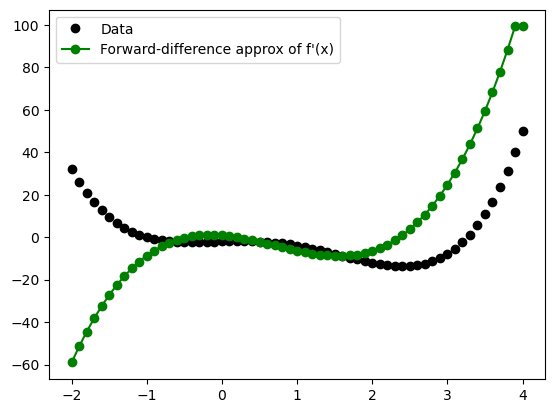

In [68]:
import matplotlib.pyplot as plt
plt.plot(xdata, ydata, 'ko', label='Data')
plt.plot(xdata, fp, '-og', label="Forward-difference approx of f'(x)")
plt.legend()

Notice that we could do it the other way, by using the backward-difference approximation everywhere except at the first data point where we use the forward-difference approximation.

In [69]:
fp_back = np.zeros(ydata.shape) # Makes fp the same shape as ydata.
for k in range(1, len(xdata)): # Now we loop starting at 1 (because backward difference doesn't work at 0), 
                               # and go up until the end because backward difference can.
    fp_back[k] = 1/h*(ydata[k] - ydata[k-1]) # Use the backward-difference formula, except at the first point.
# Use the forward-difference formula at the left endpoint
fp_back[0] = 1/h*(ydata[1] - ydata[0]) # (f(x+h) - f(x))/h

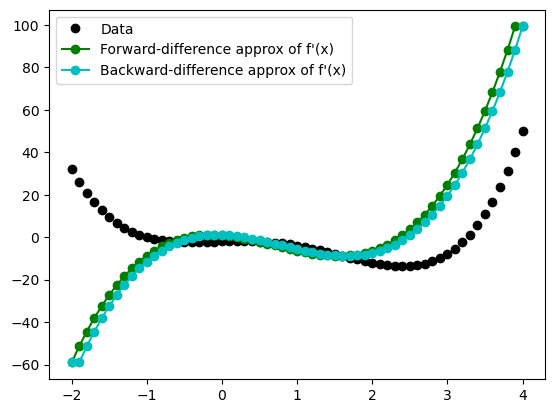

In [70]:
plt.plot(xdata, ydata, 'ko', label='Data')
plt.plot(xdata, fp, '-og', label="Forward-difference approx of f'(x)")
plt.plot(xdata, fp_back, '-oc', label="Backward-difference approx of f'(x)")
plt.legend()

It turns out that I actually know what the derivative should be here. Let's plot it. I'm going to turn on the fancy Jupyter notebook setting "matplotlib notebook" so that we can zoom in.

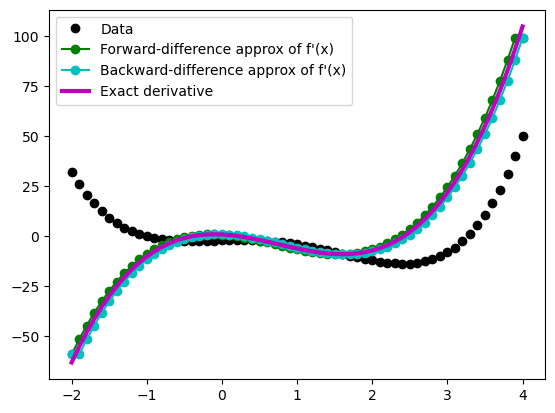

In [71]:
plt.figure(5) # Label this figure as Figure 5
plt.plot(xdata, ydata, 'ko', label='Data')
plt.plot(xdata, fp, '-og', label="Forward-difference approx of f'(x)")
plt.plot(xdata, fp_back, '-oc', label="Backward-difference approx of f'(x)")
fp_true = lambda x: 4*x**3 - 9*x**2 - 2*x + 1
plt.plot(xdata, fp_true(xdata), "m", linewidth=3, label='Exact derivative')
plt.legend()

We can see that where the forward-difference over approximates the backward-difference under-approximates and vice versa. This makes us think that maybe we should average the two. Let's give it a go, mathematically.

\begin{align*}
f'(x) &= \frac12 (f'(x) + f'(x)) \\
&= \frac12\left[ \frac{f(x+h) - f(x)}{h} + \mathcal{O}(h) + \frac{f(x) - f(x-h)}{h} + \mathcal{O}(h)\right] \\
&= \frac12\left[\frac{1}{h}\left(f(x+h) - f(x) + f(x) - f(x-h)\right)+ \mathcal{O}(h)\right] \\
&= \frac{f(x+h) - f(x-h)}{2h} + \mathcal{O}(h)
\end{align*}

This looks good, in fact it's the centered-difference approximation we came up with in the activity? Can you see what's wrong though?

This can show you the danger of adding two things that are the same order with the big-O notation, if they are the largest error term you are keeping track of. By looking back at the activity we can see that the $\mathcal{O}(h)$ terms in the approximations are equal and opposite in sign so they actually cancel when added. We know that actually
$$
\frac{f(x+h) - f(x-h)}{2h} = f'(x) + \mathcal{O}(h^2).
$$
Let's compute the derivative using the centered-difference scheme and see if we can notice the difference. Notice that now **we can't use centered-difference scheme at the left or the right endpoint** because it has the drawbacks of both the forward and backward schemes. Instead, we use the Forward-Difference approximation at the left endpoint and the Backward-Difference approximation at the right endpoint.

In [72]:
fp_centered = np.zeros(ydata.shape) # Makes fp the same shape as ydata.
fp_centered[0] = 1/h*(ydata[1] - ydata[0]) # (f(x+h) - f(x))/h
for k in range(1, len(xdata)-1): # Now we loop starting at 1 (because backward difference doesn't work at 0), 
                               # and go up until the end-1 because backward difference doesn't work at the end.
    fp_centered[k] = 1/(2*h)*(ydata[k+1] - ydata[k-1]) # Use the centered-difference formula.
# Use the backward-difference formula at the right endpoint
fp_centered[-1] = 1/h*(ydata[-1] - ydata[-2])

<Figure size 640x480 with 0 Axes>

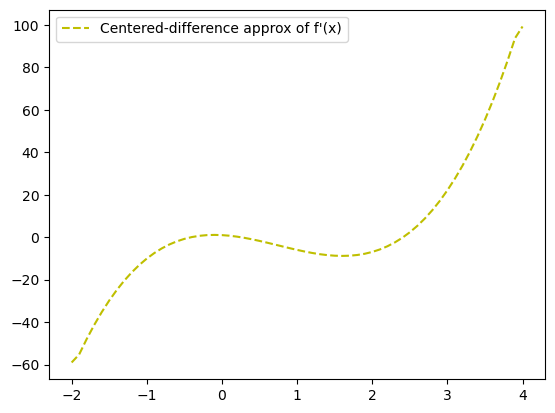

<Figure size 640x480 with 0 Axes>

In [73]:
plt.plot(xdata, fp_centered, '--y', label="Centered-difference approx of f'(x)")
plt.legend()
plt.figure(5)

Notice that this is significantly better. Let's see if we can observe the $\mathcal{O}(h^2)$ error numerically. We will go back to using the function $f(x) = \sin(x)$ to do this and we will use the point $x_0 = \pi/2$. 

In [74]:
true_deriv = 0 # This is the true value of the derivative at x0 = pi/2.
x0 = np.pi/2
f = lambda x: np.sin(x)
for h in deltax_vals: # Loop over the h_vals
    approx = (f(x0+h) - f(x0-h))/(2*h)
    print(np.abs(approx - true_deriv))

0.0
0.0
0.0
0.0


Uh-oh... zero?! Yup. The sign of the forward and backward difference are actually opposite, so they totally cancel out at this point. That's just lucky, let's look at a different point. This is an example of how the $\mathcal{O}(h^2)$ is a **worst-case** scenario. You could get lucky and the error could be smaller!

Let's look instead at $x_0 = 1$. 

In [75]:
x0 = 1
true_deriv = np.cos(1) # This is the true value of the derivative at x0 = 1
f = lambda x: np.sin(x)
for h in deltax_vals: # Loop over the h_vals
    approx = (f(x0+h) - f(x0-h))/(2*h)
    print(np.abs(approx - true_deriv))

0.0009000536983791996
9.004993400729688e-06
9.00503946965614e-08
9.004295087322589e-10


Nice, we see the $\mathcal{O}(h^2)$ we would expect. 

A useful way to compare the order of accuracy of multiple methods is to plot the error for multiple values of $h$ and then find the trend using a trend line. This is especially helpful for methods where you cannot analytically find the exact order of accuracy. This type of plot is seen all over numerical analysis. It is not only used for accuracy of derivative approximations.

We will introduce some new things in this code so I'll go piece by piece.

First, go back to matplotlib "inline" mode to make the figures more compact. Then create a new figure and an array `error` which will hold the error for each of the $\Delta x$ values for each of the 3 methods. As a result, it will have `len(deltax_vals)` rows and `3` columns.

In [76]:
%matplotlib inline
plt.figure(6)
error = np.zeros([len(deltax_vals),3])
print(error.shape)

(4, 3)


<Figure size 640x480 with 0 Axes>

Now we want to loop over each of the `deltax_vals`. Before we did 
            ` for deltax in deltax_vals` but this time we also want a counter so that we can index this `error` array. python has a nice way of keeping track of both using `enumerate`. Here's an example.

In [77]:
for index, deltax in enumerate(deltax_vals):
    print(index)
    print(deltax)

0
0.1
1
0.01
2
0.001
3
0.0001


We can see that `index` keeps track of which `deltax` we are looking at. Let's use this in the loop.

In [78]:
true_deriv = np.cos(x0) # This shouldn't be in the for loop 
                        # because we only need to do it once.
for index, h in enumerate(deltax_vals): # Loop over the deltax_vals
    forward_diff = (f(x0 + h) - f(x0))/h
    backward_diff = (f(x0) - f(x0-h))/h
    central_diff = (f(x0+h) - f(x0-h))/(2*h)
    
    forward_err = np.abs(forward_diff - true_deriv)
    backward_err = np.abs(backward_diff - true_deriv)
    central_err = np.abs(central_diff - true_deriv)

    error[index, :] = np.array([forward_err, backward_err, central_err])
    
print(error)

[[4.29385533e-02 4.11384459e-02 9.00053698e-04]
 [4.21632486e-03 4.19831487e-03 9.00499340e-06]
 [4.20825508e-04 4.20645407e-04 9.00503947e-08]
 [4.20744495e-05 4.20726487e-05 9.00429509e-10]]


Notice that we are seeing an order of magnitude decrease every step down the first two columns and 2 orders of magnitude decrease every step down the last column. That is because we are changing $h$ by an order of magnitude as we go down the columns and forward and backward-difference are first-order accurate while central difference is second-order accurate.

We can visualize this as follows.

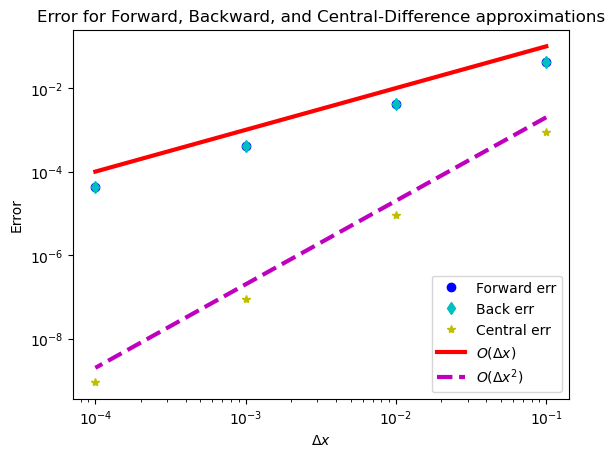

In [79]:
plt.figure(7)
plt.loglog(deltax_vals, error[:, 0], 'bo', label='Forward err')
plt.loglog(deltax_vals, error[:, 1], 'cd', label='Back err')
plt.loglog(deltax_vals, error[:, 2], 'y*', label='Central err')
plt.loglog(deltax_vals, 1*deltax_vals, 'r', linewidth=3, label=r'$O(\Delta x)$')
plt.loglog(deltax_vals, 0.2*deltax_vals**2, 'm--', linewidth=3, label=r'$O(\Delta x^2)$')
plt.xlabel(r'$\Delta x$')
plt.ylabel('Error')
plt.title('Error for Forward, Backward, and Central-Difference approximations')
plt.legend()

Here is how we interpret such a figure. First, we recognize that there are three *datasets* plotted, the error for Forward (`Forward err`), the error for Backward (`Back err`), and the error for Central (`Central err`). We can see that as $\Delta x$ increases (left to right), the error also increases for each of the methods. Visually we want to see the *rate at which they increase* because that tells us about the order of accuracy of the method. To do that, we use a `loglog` plot. A `loglog` plot plots the logarithm of the `\Delta x` values on the horizontal axis and the logarithm of the `Error` values on the vertical axis. We use a `loglog` plot when the dataset covers several *orders of magnitude* along both axes. 

The order of the method is in terms of the power on $\Delta x$ in the error term (compare $\mathcal{O}(\Delta x)$ versus $\mathcal{O}(\Delta x^2)$). Therefore, on a loglog plot what we should see is $\mathcal{O}(\log \Delta x)$ and $\mathcal{O}(\log(\Delta x^2))$. But notice that $\log(\Delta x^2) = 2\log(\Delta x)$ by the logarithm rules. Since we are plotting $\log(\Delta x)$ on the horizontal axis, if we are plotting an order-1 ($\mathcal{O}(\Delta x)$) method, we would be plotting $\log(\Delta x)$ versus $\log(\Delta x)$, where $C$ is some constant. This looks like a straight line with slope 1. If we are plotting an order-2 ($\mathcal{O}(\Delta x^2)$) method, we would be plotting $\log(\Delta x)$ versus $2 \log(\Delta x)$, which is a straight line with slope 2. Therefore, **it is the slope** of the trend line that tells us the order of accuracy in the `loglog` plot. 

Now we are almost done with numerical differentiation, but not quite. We can see from the plot of the numerical derivative above that approximation is very good, but notice that it is off at the endpoints. That is because the endpoints use a **first order method** while the other points use second order. It is a good idea to try to use the same order method for all points. So we need a new approximation that is second order (like central difference) but will work at the endpoints. At the right endpoint, we need to use only formulas that have $f(x),~f(x-h),~f(x-2h), \ldots$ etc. At the left endpoint we need to use only formulas that have $f(x),~f(x+h),~f(x+2h), \ldots$ etc. 

Luckily on the activity you already derived the series for $f(x+2h)$ so let's talk about the method that will work at the left endpoint. 

Consider the series

$
\begin{align}
 f(x) &= f(x) +&& 0f'(x) &&+ 0f''(x) &+& 0\\
  f(x+h) &= f(x) +&& h f'(x) &&+ \frac12 h^2 f''(x) &+& \frac1{3!} h^3 f'''(x) &+& \mathcal{O}(h^4)\\
   f(x+2h) &= f(x) +&& 2h f'(x) &&+ 2 h^2 f''(x) &+& \frac4{3} h^3 f'''(x) &+& \mathcal{O}(h^4).
\end{align}
$

Now take a minute to think about how you can add these together to get a second-order accurate method. You will need to eliminate the $f(x)$ terms and the $f''(x)$ terms. 

You should have found
$$f'(x) = \frac{-3f(x) + 4f(x+h) - f(x+2h)}{2h} + \mathcal{O}(h^2).$$
You can also *check* that this works by plugging in the Taylor Series for $f(x+h)$ and $f(x+2h)$ into the formula above:
$$
\frac{1}{2h} \left[ -3 f(x) + 4f(x+h) - f(x+2h) \right] =
\frac{1}{2h} \left[-3f(x) + 4 \left(f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac1{3!} f'''(x)\right) - \left(f(x) + 2h f'(x) + 2h^2 f''(x) + \frac43 f'''(x)\right) + \mathcal{O}(h^4)\right]\\
= \frac1{2h} \left[ 2h f'(x) -\frac23 h^3 f''(x) + \mathcal{O}(h^4) \right]\\
= f'(x) + \mathcal{O}(h^2)
$$

Now we can use this at the left endpoint as follows

In [80]:
h = xdata[2] - xdata[1]
fp_centered = np.zeros(ydata.shape) # Makes fp the same shape as ydata.
fp_centered[0] = (-3*ydata[0] + 4*ydata[1] - ydata[2])/(2*h);
for k in range(1, len(xdata)-1): # Now we loop starting at 1 (because backward difference doesn't work at 0), 
                               # and go up until the end-1 because backward difference doesn't work at the end.
    fp_centered[k] = 1/(2*h)*(ydata[k+1] - ydata[k-1]) # Use the centered-difference formula.
# Use the backward-difference formula at the right endpoint
fp_centered[-1] = 1/h*(ydata[-1] - ydata[-2])

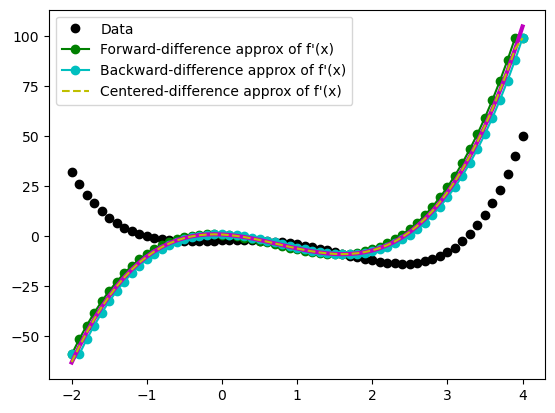

In [81]:
%matplotlib inline
plt.figure(8) # Label this figure as Figure 5
plt.plot(xdata, ydata, 'ko', label='Data')
plt.plot(xdata, fp, '-og', label="Forward-difference approx of f'(x)")
plt.plot(xdata, fp_back, '-oc', label="Backward-difference approx of f'(x)")
fp_true = lambda x: 4*x**3 - 9*x**2 - 2*x + 1
plt.plot(xdata, fp_true(xdata), "m", linewidth=3)
plt.legend()

plt.plot(xdata, fp_centered, '--y', label="Centered-difference approx of f'(x)")
plt.legend()

Notice how much more accurate the approximation is at the left endpoint than the right. We won't fix the right now because I will let you derive and implement that one on your own on the homework! 

# Numerical integration

That is everything we need to cover about numerical differentiation. You will get lots of practice on that on the homework. Now let's move on to numerical integration, Calculus 2!

We will discuss several methods for numerical integration.  The general setup will be exactly the same as for differentiation.  We will either be given a function $f(x)$ and asked to compute 

$\displaystyle\int_{a}^{b}f(x)\,\textrm{d}x, \hspace{1in}$ (1)

or we will be given a set of points $(x_0, y_0)$, $(x_1, y_1)$, $\dotsc$, $(x_N, y_N)$, where $y_k = f(x_k)$ for some (usually unknown) function $f(x)$ and then asked to compute

$\displaystyle\int_{a}^{b}f(x)\,\textrm{d}x$.  

By convention, we will always assume that $a = x_0 < x_1 < \cdots < x_N = b$ and that the points are all evenly spaced, so $x_k - x_{k-1} = \Delta x$ is the same for all $k$.  That is, we will assume that $x_k = a + k\Delta x$ for all $0\leq k \leq N$.  The assumption that the points are in order is really no restriction at all, since we can always re-organize any data we are given.  The assumption that these points are evenly spaced is more restrictive.  In practice, it is very common to have evenly spaced data (perhaps because you are making measurements at regular times or at locations on a regular grid), but it is not strictly necessary.  It turns out that none of the methods we will discuss actually require this even spacing, but the formulas become much messier when $\Delta x$ is not constant.  It is also worth noting that there are $N + 1$ points here, not just $N$, because we start counting at $x_0$.  

As in the previous two lectures, it is easy to switch back and forth between these two settings.  If we are given a function $f(x)$, then we can simply plug in all of our $x$ values and then forget about the function.  If we are given a set of $(x_k, y_k)$ points, then we can (at least on paper) pretend that $y_k = f(x_k)$ and just never use a formula for $f(x)$.  When working on paper, it is generally much more convenient to think in terms of a function $f$, but in real world applications we often only have a set of data points, so it is important to be comfortable with both sets of notation.  

Remember that the integral in (1) can be thought of as the area under the curve $f(x)$ between $x = a$ and $x = b$.  All of our methods will be based upon the following idea: We can chop this area up into many smaller regions, then calculate the area of each smaller region and add them all up.  As long as the smaller regions approximately cover the whole area, then we will get a good approximation to the total integral.  

It turns out that integration methods are generally much more difficult to analyze than difference schemes, so we will only fully analyze the simplest methods.  You have almost certainly seen these simple methods in Calculus 2.

## Left Hand Rule
The basic idea in our first approach is to chop the area under the curve $f(x)$ into $N$ different rectangles.  The base of the first rectangle will be the interval $[x_0, x_1]$, then the base of the second rectangle will be $[x_1, x_2]$, and so on, all the way to the $N$th rectangle, whose base will be $[x_{N-1}, x_N]$.  In general, the base of the $k$th rectangle will be the interval $[x_{k-1}, x_k]$.  Because we assumed that the $x$ values were all evenly spaced, the width of each of these intervals is just $\Delta x$.  We will determine the height by evaluating the function $f(x)$ at some point in the base.  The only real choice involved here is which point we use to determine the height.  

The first approximation method we will discuss is called the *left hand rule* or *left rectangle rule*.  In this method, we choose the height of the $k$th rectangle to be $f(x_{k-1})$.  (The name comes from the fact that $x_{k-1}$ is the leftmost point in the base of the rectangle.)

We can visualize this with the function `plot_lhr`, given below (you don't need to know how this function works, but it would not hurt to think about it!).  

In [82]:
def plot_lhr(f, a, b, dx):
    plt.figure()
    x = np.arange(a, b + dx, dx)
    y = f(x)
    n = x.size
    
    xplot = np.arange(a, b + dx/100, dx/100)
    yplot = f(xplot)
    plt.plot(xplot, yplot, 'k')
    
    for k in range(n-1):
        x_rect = [x[k], x[k], x[k + 1], x[k + 1], x[k]]
        y_rect = [0, y[k], y[k], 0, 0]
        plt.plot(x_rect, y_rect, 'b')

For example, here are the rectangles for the function $f(x) = \sin(x) + 3$ with $a = 0$, $b = 10$ and $\Delta x = 2$.  

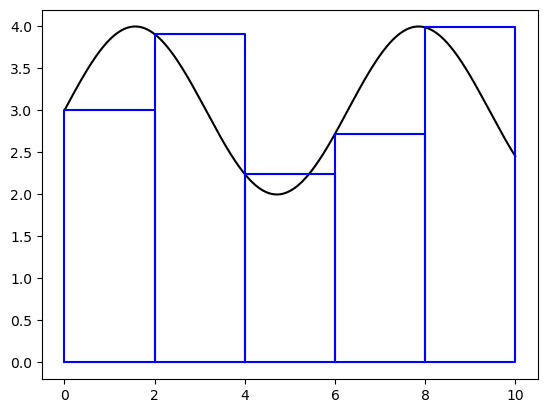

In [83]:
f = lambda x: np.sin(x) + 3
a = 0
b = 10
dx = 2
plot_lhr(f, a, b, dx)

If we plot the same function with a smaller $\Delta x$, we get

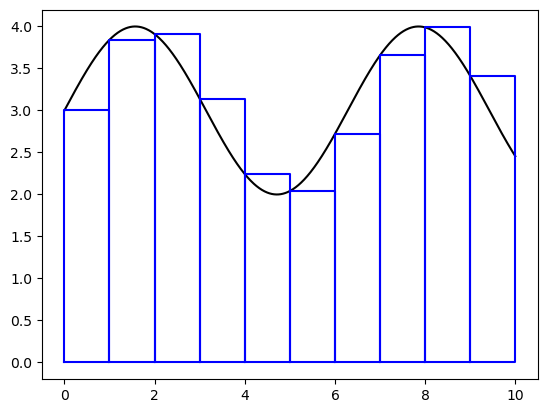

In [84]:
dx = 1
plot_lhr(f, a, b, dx)

If we shrink $\Delta x$ even further, we get

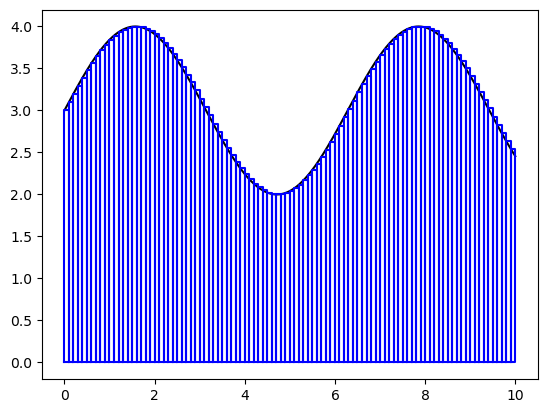

In [85]:
dx = 0.1
plot_lhr(f, a, b, dx)

The area of the $k$th rectangle is just the width times the height, or $\Delta x f(x_{k-1})$.  To find the area under the whole curve, we just add up the area of all $N$ rectangles, so we get 

$\int_{a}^{b}f(x)\,\textrm{d}x \approx \Delta x f(x_0) + \Delta x f(x_1) + \cdots + \Delta x f(x_{N-1}) = \displaystyle\sum_{k=0}^{N-1}\Delta x f(x_k) = \Delta x\displaystyle\sum_{k=0}^{N-1}f(x_k).$

How good an approximation is this?  More importantly, how does the quality of this approximation change as we reduce $\Delta x$?  To answer that question, we will first look at a simpler problem and only try to find the integral over one of the rectangles (i.e., the integral from $x_{k-1}$ to $x_k$).  The left hand rule approximation to this integral is 

$\displaystyle\int_{x_{k-1}}^{x_k}f(x)\,\textrm{d}x \approx \Delta x f(x_{k-1})$.

We can also approximate this integral by using a Taylor expansion of $f$.  In particular, we will expand $f(x)$ about the point $x_{k-1}$.  We get 

$\displaystyle\int_{x_{k-1}}^{x_k}f(x)\,\textrm{d}x = \displaystyle\int_{x_{k-1}}^{x_k}f(x_{k-1}) + (x - x_{k-1})f'(x_{k-1}) + \frac{(x - x_{k-1})^2}{2}f''(x_{k-1}) + \mathcal{O}((x - x_{k-1})^3)\,\textrm{d}x$.

This integral looks quite complicated, but we are only integrating with respect to $x$, not $x_{k-1}$, so it is really just a polynomial.  We therefore get 

$\displaystyle\int_{x_{k-1}}^{x_k}f(x)\,\textrm{d}x = \left[xf(x_{k-1}) + \frac{(x - x_{k-1})^2}{2}f'(x_{k-1}) + \frac{(x - x_{k-1})^3}{6}f''(x_{k-1}) + \mathcal{O}((x - x_{k-1})^4)\right]_{x = x_{k-1}}^{x_k}$.  

If we plug in the endpoints $x = x_{k-1}$ and $x = x_k$ into this antiderivative, then many of the terms become zero and we are left with 

$\displaystyle\int_{x_{k-1}}^{x_k}f(x)\,\textrm{d}x = (x_k - x_{k-1})f(x_{k-1}) + \frac{(x_k - x_{k-1})^2}{2}f'(x_{k-1}) + \frac{(x_{k} - x_{k-1})^3}{6}f''(x_{k-1}) + \mathcal{O}((x_k - x_{k-1})^4)$

$= \Delta xf(x_{k-1}) + \frac{(\Delta x)^2}{2}f'(x_{k-1}) + \frac{(\Delta x)^3}{6}f''(x_{k-1}) + \mathcal{O}(\Delta x^4)$.  

Since $\Delta x$ is supposed to be very small, higher powers of $\Delta x$ will be even smaller, so we can safely ignore the $\mathcal{O}(\Delta x^3)$ terms.  This means that we have 

$\displaystyle\int_{x_{k-1}}^{x_k}f(x)\,\textrm{d}x \approx \Delta x f(x_{k-1}) + \frac{(\Delta x)^2}{2}f'(x_{k-1})$.

Notice that the first term matches our approximation from the left hand rule.  This means that the left hand rule gives us a good approximation of the integral over this small interval and that the error from the left hand rule is $\frac{(\Delta x)^2}{2}f'(x_{k-1})$.  In particular, this error has a $\Delta x^2$ in it, so we say that it is second order.  We call this quantity the *local error* for the left hand rule, and we say that the left hand rule has second order local error.  

However, it is important to remember that this isn't really the problem we wanted to solve.  We just found a second order approximation to the integral of $f(x)$ from $x_{k-1}$ to $x_k$, but we wanted to approximate the integral from $a$ to $b$.  The total integral involves $N$ of these small intervals, so the total error will be roughly $N\frac{(\Delta x)^2}{2}f'(x_{k-1})$.  You might be tempted to think that $N$ is simply a constant, so we can ignore it when we use big-oh notation and just say that the total error is $\mathcal{O}(\Delta x^2)$, but this would be incorrect.  The problem is that $N$ actually depends on $\Delta x$.  If we make $\Delta x$ smaller, then we need more rectangles to cover the whole area.  In particular, we have $N = (b - a)/\Delta x$.  This means that the error for the entire integral is $\frac{(b - a)\Delta x}{2}f'(x_{k-1})$, which only has a $\Delta x^1$.  We call this quantity the *global error* of the left hand rule and we say that the left hand rule has first order global error.  

It is very easy to implement the left hand rule in python.  As an example, let's try to find the integral of $f(x) = \sin(x) + 3$ between $a = 0$ and $b = 10$.  The antiderivative of this function is $F(x) = -\cos(x) + 3x$, and so the actual solution is 

$\displaystyle\int_{a}^{b}\sin(x) + 3\,\textrm{d}x = \left(-\cos(b) + 3b\right) - \left(-\cos(a) + 3a\right)$.  

In [86]:
print((-np.cos(b) + 3 * b) - (-np.cos(a) + 3 * a))

31.839071529076453


To set up our problem, we need to choose a list of $x$ values and calculate the corresponding $y$ values.  For example, if we choose $\Delta x = 1$ then we have 

In [87]:
dx = 1
x = np.arange(a, b + dx, dx)
y = f(x)

To calculate the left hand rule, we have to add up $(\Delta x) y_k$ for every $y$ value except the last one.  One approach (which we have used several times in this class already) is to add these terms one at a time in a loop.  For example, 

Another option is to collect all of the necessary $y$ values and then use the numpy function `sum` to add them all up.  Since we want to add the first through the second to last entries of $y$, we can use 

In [88]:
LHR = dx * np.sum(y[:-1])
print(LHR)

31.955209482107378


## Right-hand rule

You have probably seen this in Calculus 2, we will cover it next week!